In [408]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('train_housing.csv')

In [5]:
df.shape

(1460, 81)

In [6]:
df.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500

In [7]:
target_feat = 'SalePrice'

In [8]:
df.drop('Id',1, inplace=True) ## dropping id

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Data Inspection and early stage data cleaning

#### Inspecting the features and applying fixes

In [10]:
[print(x ,'\n',df[x].unique(),) for x in df.select_dtypes('object', 'category').columns]


MSZoning 
 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street 
 ['Pave' 'Grvl']
Alley 
 [nan 'Grvl' 'Pave']
LotShape 
 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 
 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 
 ['AllPub' 'NoSeWa']
LotConfig 
 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 
 ['Gtl' 'Mod' 'Sev']
Neighborhood 
 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 
 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 
 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType 
 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 
 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle 
 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl 
 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### We see a in a bunch of categorical features, that values are being picked as `nan`, when they're not

In [11]:
## fixing incorrect nan values
not_available = 'not_available'
df.Alley.fillna(not_available,inplace=True)
df.BsmtQual.fillna(not_available, inplace = True)
df.BsmtCond.fillna(not_available, inplace = True)
df.BsmtExposure.fillna(not_available, inplace = True)
df.BsmtFinType2.fillna(not_available, inplace = True)
df.FireplaceQu.fillna(not_available, inplace = True)
df.GarageType.fillna(not_available, inplace = True)
df.GarageFinish.fillna(not_available, inplace = True)
df.GarageQual.fillna(not_available, inplace = True)
df.GarageCond.fillna(not_available, inplace = True)
df.PoolQC.fillna(not_available, inplace = True)
df.Fence.fillna(not_available, inplace = True)

In [12]:
## converting ordinal features to categorical
df.OverallQual = df.OverallQual.astype('object')
df.OverallCond = df.OverallCond.astype('object')
df.MSSubClass = df.MSSubClass.astype('object')

#### visualizing categorical features and their distributions

In [13]:
[print(x ,'\n',df[x].unique(),'\n', df[x].value_counts(),'\n', df[x].value_counts(1), '\n'+'-'*40) for x in df.select_dtypes('object',).columns]



MSSubClass 
 [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 
 20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64 
----------------------------------------
MSZoning 
 ['RL' 'RM' 'C (all)' 'FV' 'RH'] 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 
 RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64 
----------------------------------------
Street 
 ['Pave' 'Grvl'] 
 Pave    1454
Grvl       6
Name: Street, dtype: int64 
 Pave    0.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [14]:
imbalanced_feats = ['Alley','Utilities', 'Street', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'CentralAir', 'Heating', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'LandContour', 'PoolQC'] #very high imbalance -- more than 90% records belonging to 1 class


####  these independent features have high class imblance (>90%). we'll see their correlation with the dependent variable and see if we can drop them

In [15]:
ass = associations(df[[*imbalanced_feats, target_feat]], numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=False, compute_only=True, clustering=False, title=None, filename=None)



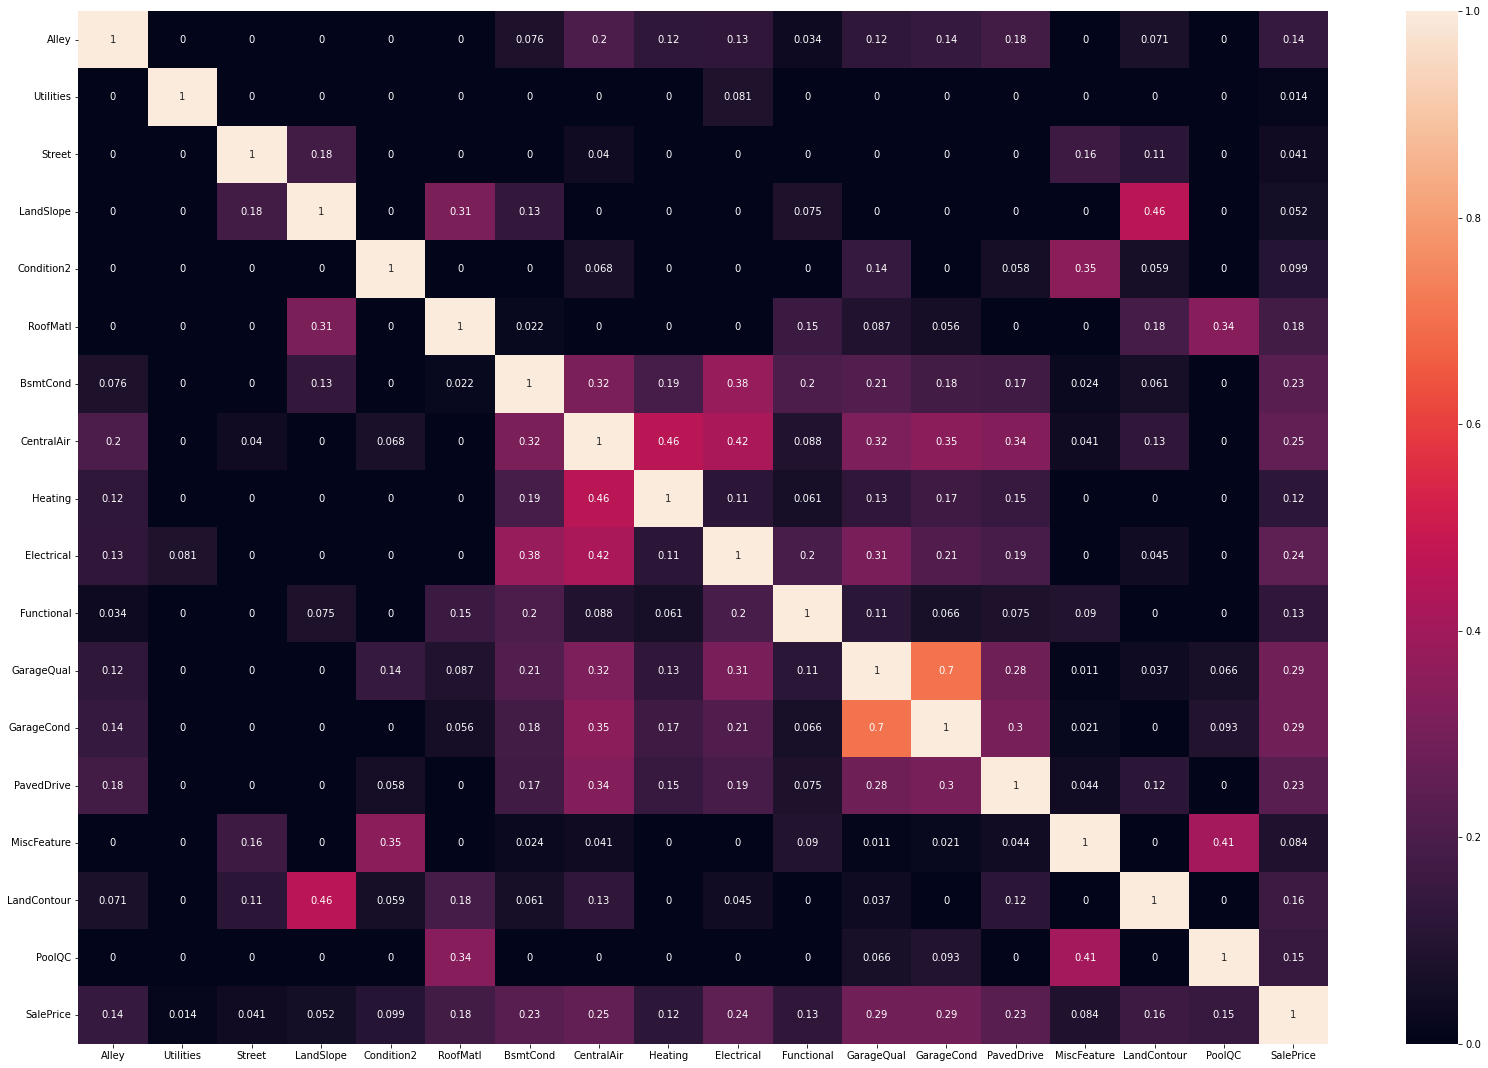

In [17]:
plt.figure(figsize=[28,19])
sns.heatmap(ass['corr'],annot=True)
plt.show()

##### we observe that all imbalanced categorical features bar `PavedDrive`, `GarageCond`, `Garagequal`, `Electrical`, `CentralAir`, `BsmntCond` have little to no predictive value on our target variable. So we can drop them

In [18]:
df.drop(list(set(imbalanced_feats) - set(['PavedDrive', 'GarageCond', 'GarageQual', 'Electrical', 'CentralAir', 'BsmtCond'])), 1, inplace = True)


#### summary metrics for numerical features

In [19]:
df.select_dtypes(([int, float])).describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1201.000000    1460.000000  1460.000000   1460.000000  1452.000000   
mean     70.049958   10516.828082  1971.267808   1984.865753   103.685262   
std      24.284752    9981.264932    30.202904     20.645407   181.066207   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      59.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      80.000000   11601.500000  2000.000000   2004.000000   166.000000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014  1978.506164     1.767123   472.980137    94.244521   
std       0.644666    24.689725     0.747315   213.804841   125.338794   
min       0.000000  1900.000000     0.000000     0.000000     0.000000   
25%       0.000000  1961.000000     1.000000   334.500000     0.000000   
50%       1.000000  1980.000000     2.000000   480.000000     0.000000   
75%       1.000000  2002.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000

In [20]:
df.head(3)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg       FR2      Veenker   
2         60       RL         68.0    11250      IR1    Inside      CollgCr   

  Condition1 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           7           5       2003   
1      Feedr     1Fam     1Story           6           8       1976   
2       Norm     1Fam     2Story           7           5       2001   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0         706          Unf           0        150          856        Ex   
1         978          Unf           0        284         1262        Ex   
2         486          Unf           0        434          920        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   

  KitchenQual  TotRmsAbvGrd  Fireplaces    FireplaceQu GarageType  \
0          Gd             8           0  not_available     Attchd   
1          TA             6           1             TA     Attchd   
2          Gd             6           1             TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0       2003.0          RFn           2         548         TA         TA   
1       1976.0          RFn           2         460         TA         TA   
2       2001.0          RFn           2         608         TA         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   

   PoolArea          Fence  MiscVal  MoSold  YrSold SaleType SaleCondition  \
0         0  not_available        0       2    2008       WD        Normal   
1         0  not_available        0       5    2007       WD        Normal   
2         0  not_available        0       9    2008       WD        Normal   

   SalePrice  
0     208500  
1     181500  
2     223500

In [21]:
df.OverallQual = df.OverallQual.astype('int')
df.OverallCond = df.OverallCond.astype('int')

###  EDA

In [22]:
df.YrSold.min(), df.YrSold.max()

(2006, 2010)

Text(0.5, 1.0, 'Sale Price vs Year Sold')

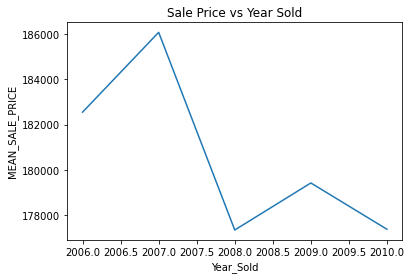

In [23]:
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('Year_Sold')
plt.ylabel('MEAN_SALE_PRICE')
plt.title("Sale Price vs Year Sold")

##### In our plot of mean price vs year sold, we can clearly observe the effect of 2008 housing market crash

In [24]:
palette = iter(sns.color_palette("Set2", 200))

##### visualizing numerical features with boxplots

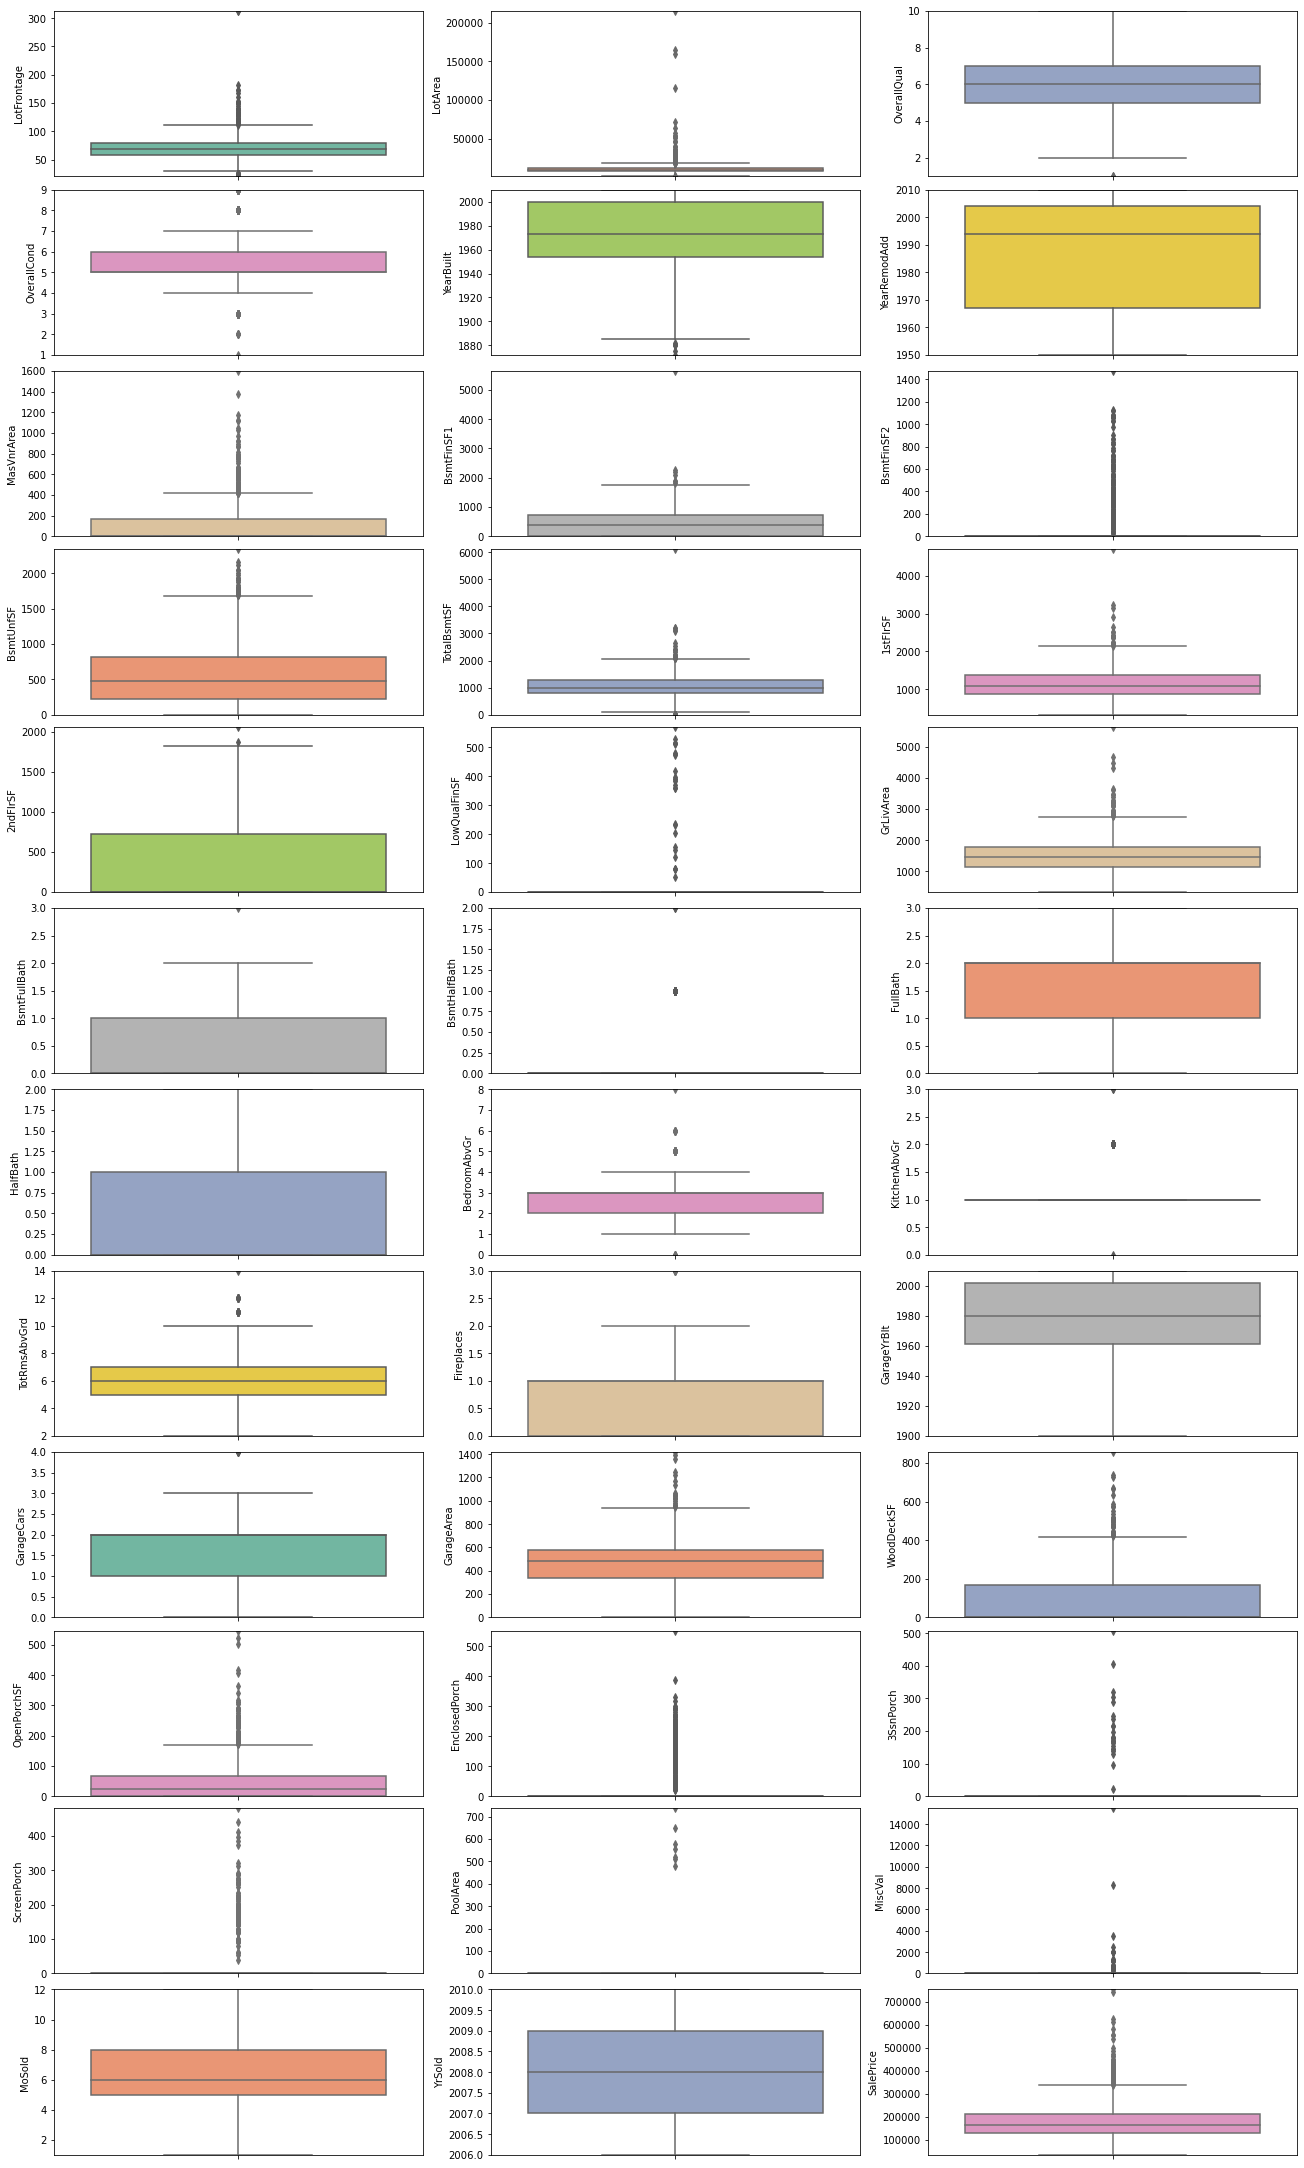

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [25]:
selection = df.select_dtypes([int, float]).columns
fig, axes = plt.subplots(12, 3, constrained_layout=True, figsize=(18,30))
for i, col in enumerate(selection):
    plt.figure(figsize=(15,15))
    ax = sns.boxplot(y=df[col], ax=axes.flatten()[i], color=next(palette),)
    ax.set_ylim(df[col].min(), df[col].max())
    ax.set_ylabel(col)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=1.5, 
#                     top=0.9, 
#                     wspace=0.4, 

#                     hspace=0.4)
# fig.delaxes(axes[11][2])
# fig.delaxes(axes[11][1])
plt.show()

#####  we observe the presence of some outliers in few of the features. we'll look at it more closely while performing feature engineering and make the fixes, if necessary

#### plotting numerical features against target variable(SalePrice)

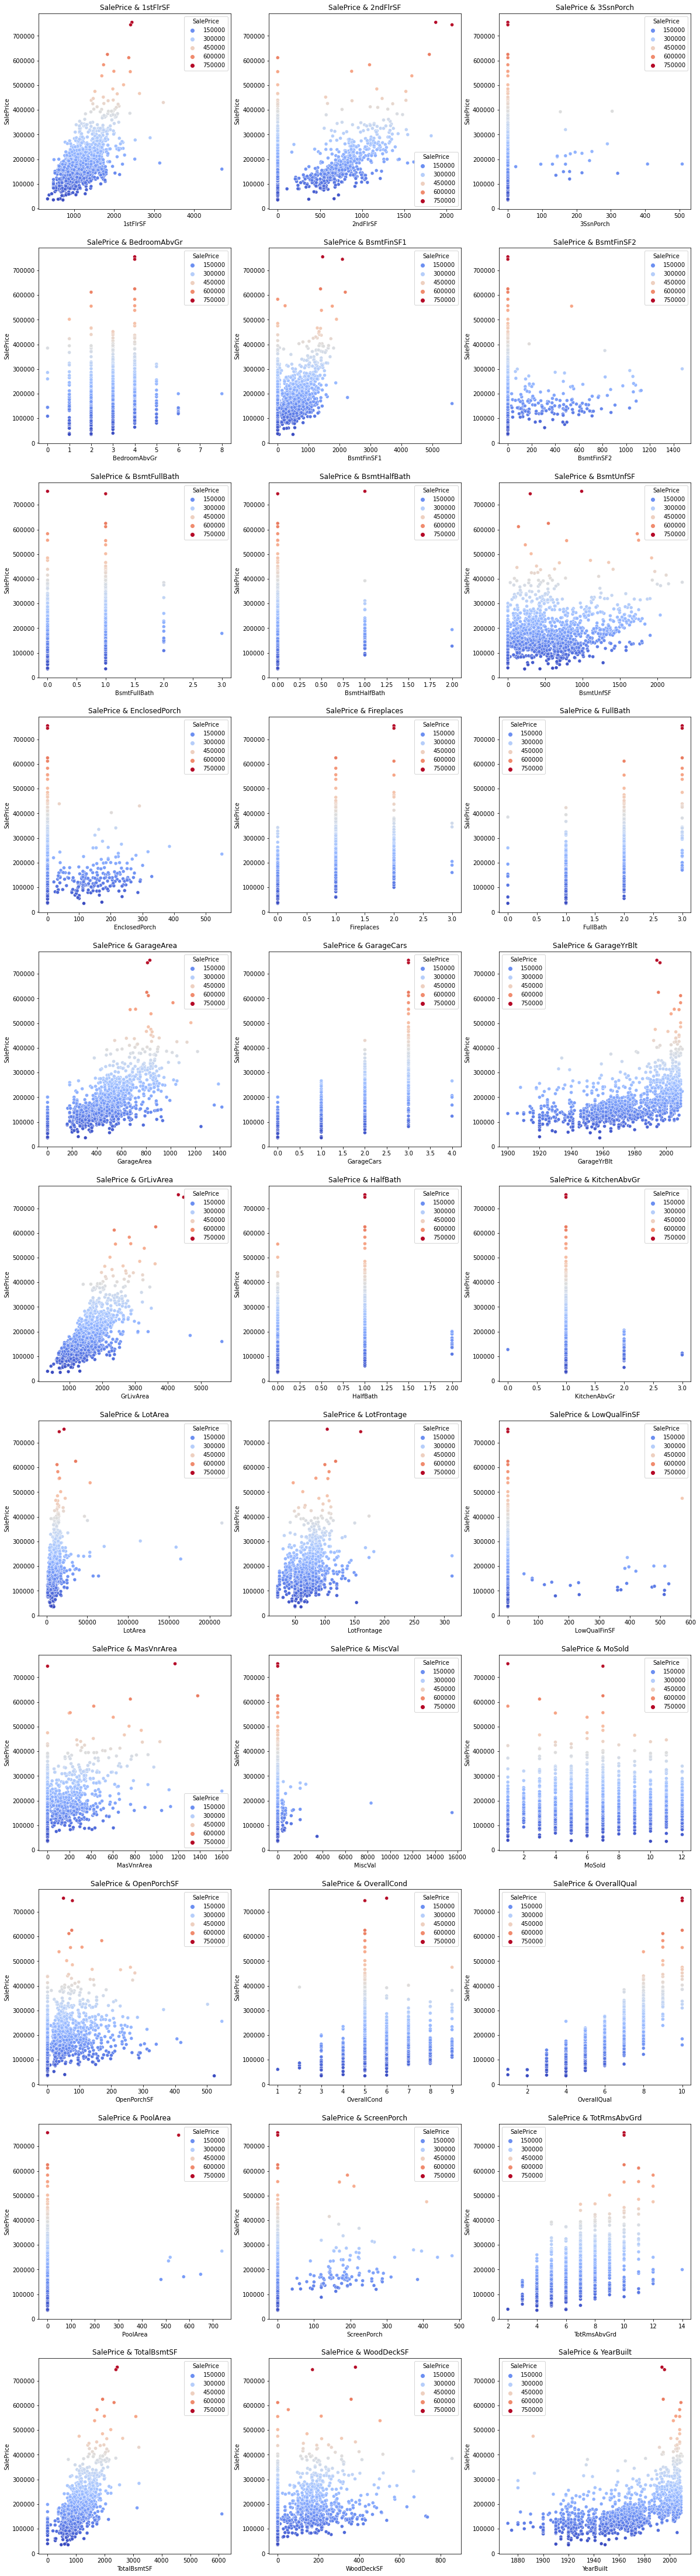

In [26]:
selection = df.select_dtypes(include=[int,float]).columns.difference([target_feat])
fig,axs= plt.subplots(11,3,figsize=(20,80))
for i,ax in zip(selection,axs.flatten()):
    sns.scatterplot(x=i, y=target_feat, data=df,hue = target_feat, ax=ax,palette=  'coolwarm')
    plt.xlabel(i,fontsize=10)
    plt.ylabel(target_feat,fontsize=10)
    ax.set_title(target_feat+' & '+str(i))
# fig.delaxes(axes[11][2])
# fig.delaxes(axes[11][1])
plt.show()

#### We observe many of the features are somewhat co-related with SalePrice

####  we can further visualize distribution for each of the numerical feature

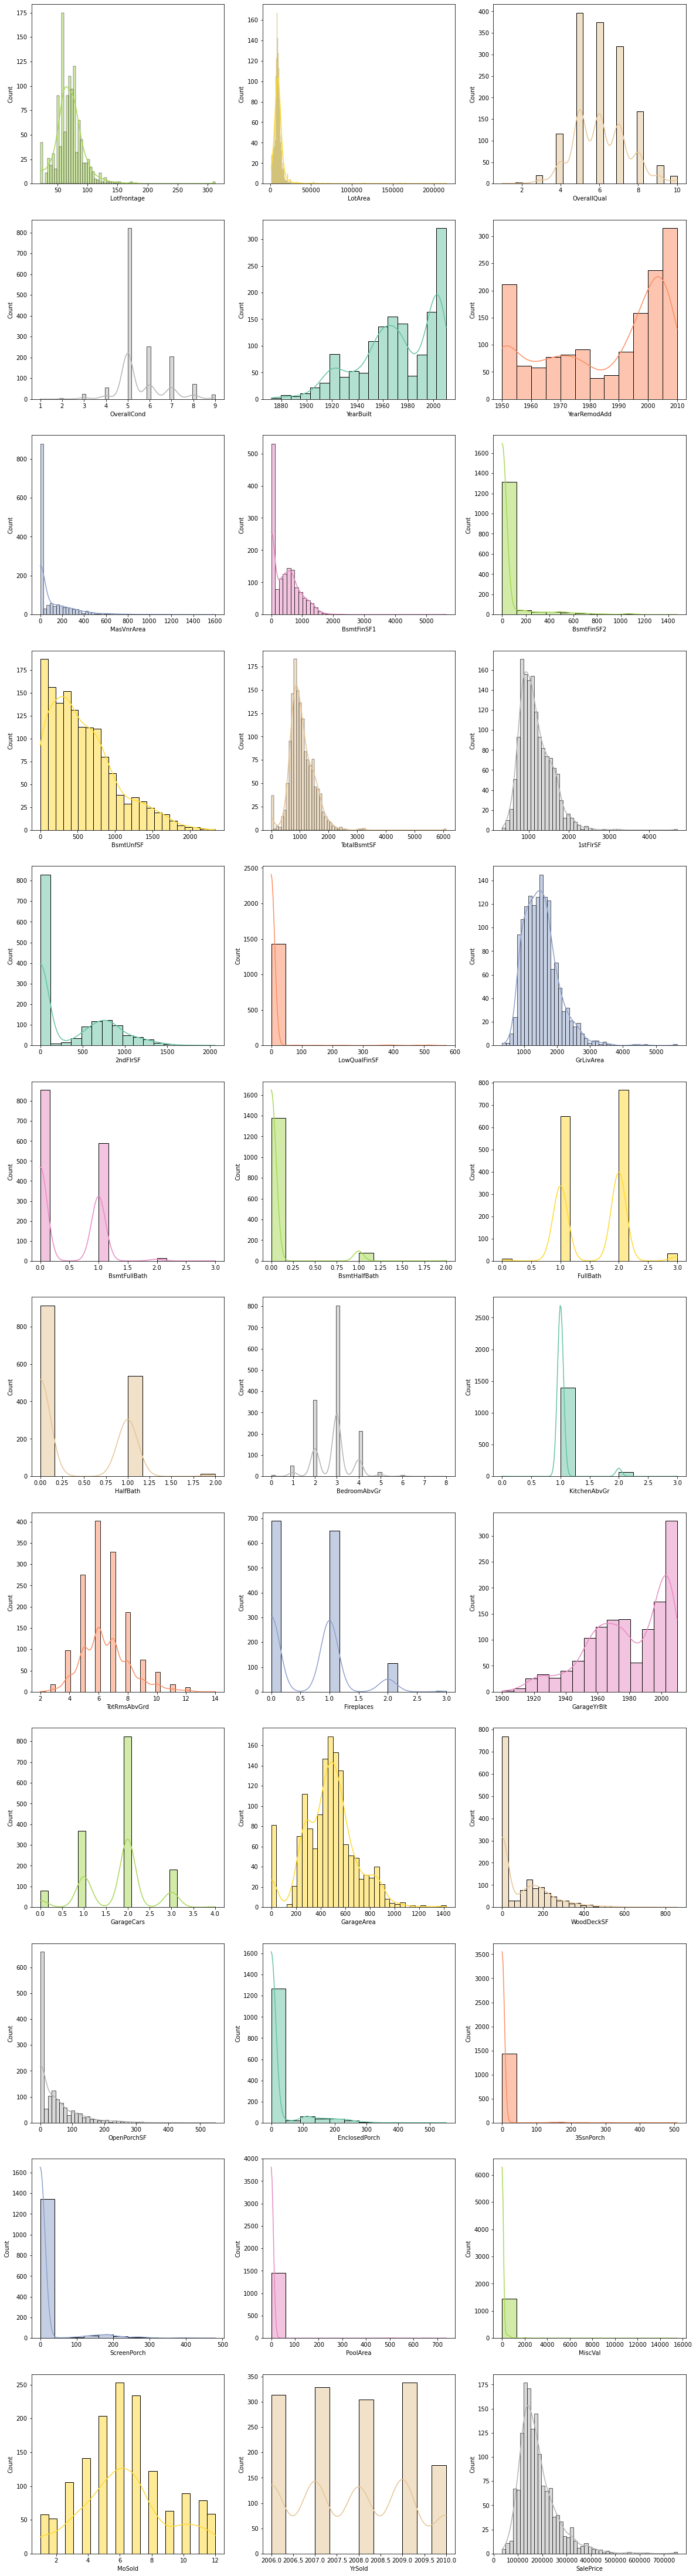

In [27]:
selection = df.select_dtypes(include=[int,float]).columns
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(selection,axs.flatten()):
    sns.histplot(df[i],ax = ax, kde = True, color=next(palette))
    plt.xlabel(i,fontsize=10)
plt.show()

####  Visualizing categorical (nominal and ordinal) features against target feature(SalePrice)

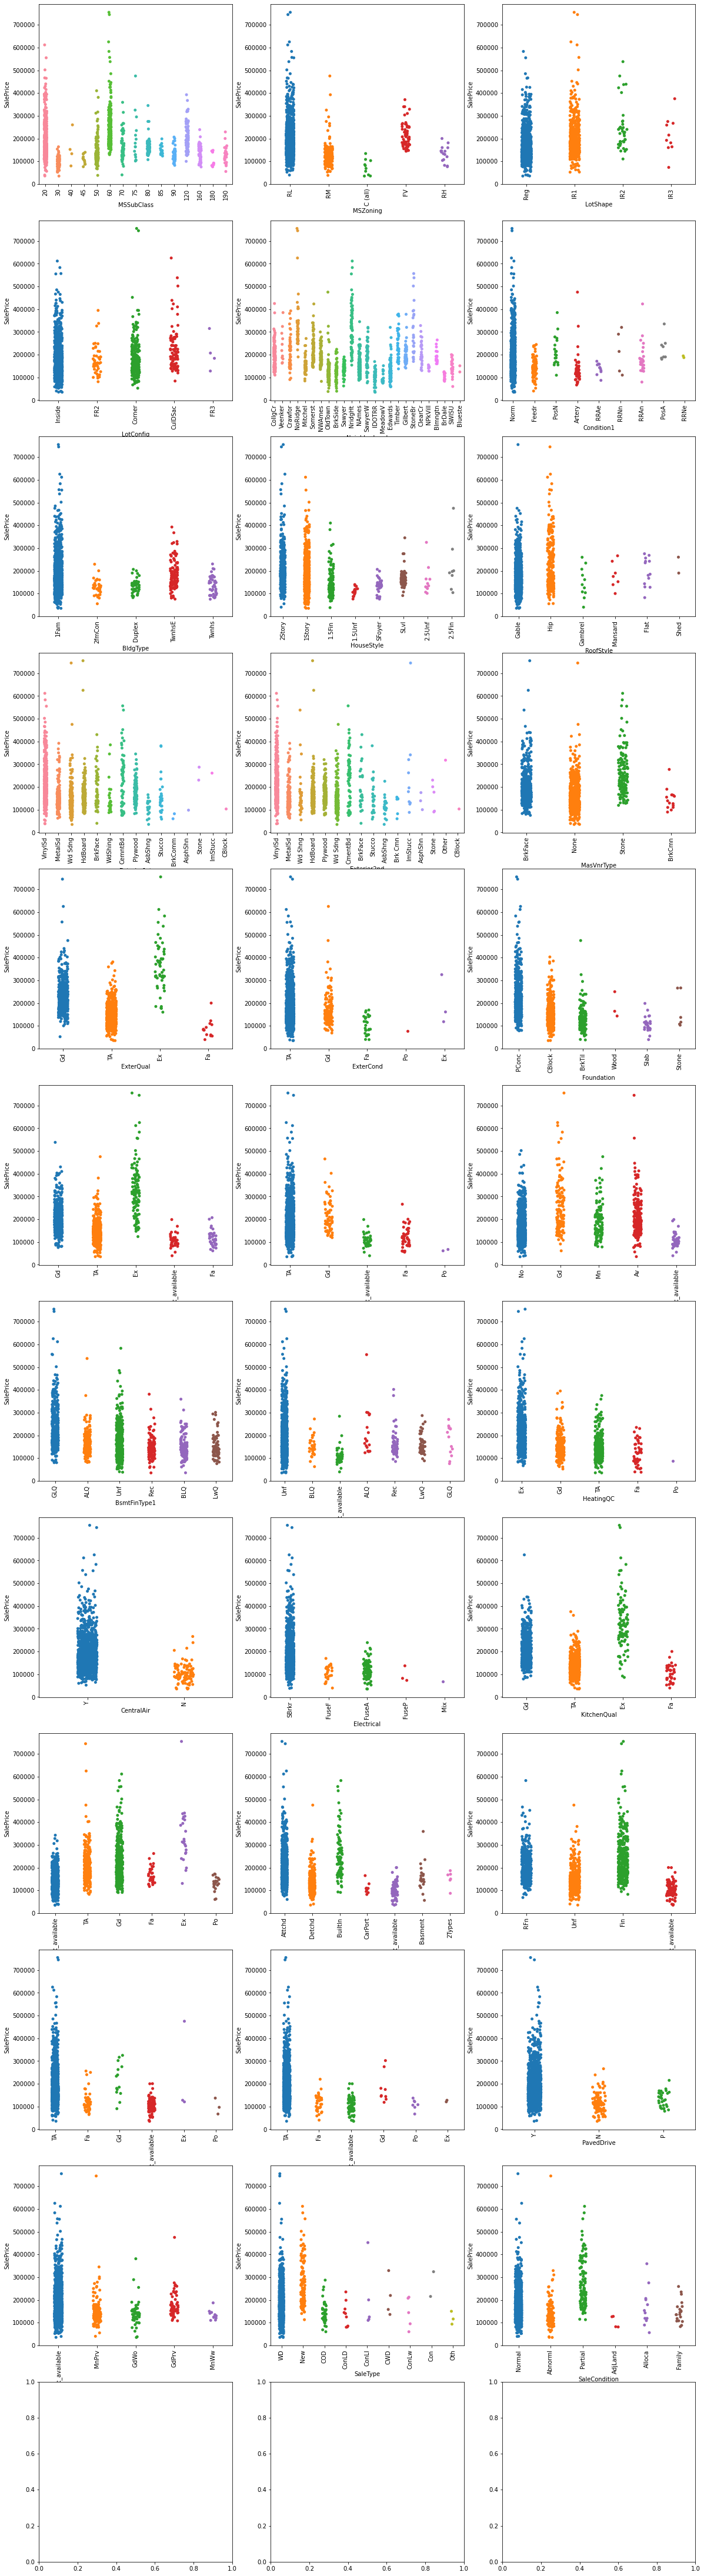

In [28]:
selection = df.select_dtypes(include=['object']).columns
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(selection,axs.flatten()):
    ax.tick_params(axis='x', rotation=90)
    sns.stripplot(x = i, y=target_feat,data = df, jitter = True, ax = ax)    
plt.show()

#### We observe many patterns and can deduce that these features have some assosiation with target feature (SalePrice)

#### observing correlations with heatmaps.
- since we have loads of features, it makes it very difficult to visualize them at once. We'll visualize the continous and categorical features seperately 

### We know  calculating Pearsons correlation is not advisable for nominal - nominal and nominal - continuous features. so we'll calculate them with differnt methods. namely:
- nominal - nominal = cramer
- numeric - numeric -  = pearson
- numeric - nominal = correlation_ratio

In [29]:
numerical_feats = ['LotFrontage',	'LotArea'	,	'MasVnrArea',	'BsmtFinSF1',	'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',	'1stFlrSF' , '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',	'WoodDeckSF'	,'OpenPorchSF',	'EnclosedPorch',	'3SsnPorch',	'ScreenPorch',	'PoolArea',	'MiscVal']
categorical_ordinal_feats =['GarageCars', 'BsmtFullBath',	'BsmtHalfBath',	'FullBath',	'HalfBath'	,'BedroomAbvGr',	'KitchenAbvGr',	'TotRmsAbvGrd',	'Fireplaces', 'OverallQual',	'OverallCond']
time_feats = ['YrSold', 'MoSold','GarageYrBlt', 'YearRemodAdd', 'YearBuilt' ]
categorical_nominal_feats = ['MSSubClass',	'MSZoning',	'LotShape',	'LotConfig',	'Neighborhood', 'Condition1', 'BldgType' ,'HouseStyle',		'RoofStyle',	'Exterior1st',	'Exterior2nd',	'MasVnrType'	 ,'Foundation'	 ,'BsmtExposure','BsmtFinType1','BsmtFinType2',	'CentralAir',	'Electrical'	,	'GarageType',	'GarageFinish',		'PavedDrive',	'Fence', 'SaleType', 'SaleCondition']
ordinal_feats_to_be_converted = ['GarageQual',	'GarageCond', 'KitchenQual',	'FireplaceQu', 'HeatingQC', 'BsmtQual', 'BsmtCond', 'ExterQual','ExterCond',]


In [30]:
ass_numeric = associations(df[[*numerical_feats, *categorical_ordinal_feats, target_feat]], numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=False, compute_only=True, clustering=False, title=None, filename=None)



<AxesSubplot:>

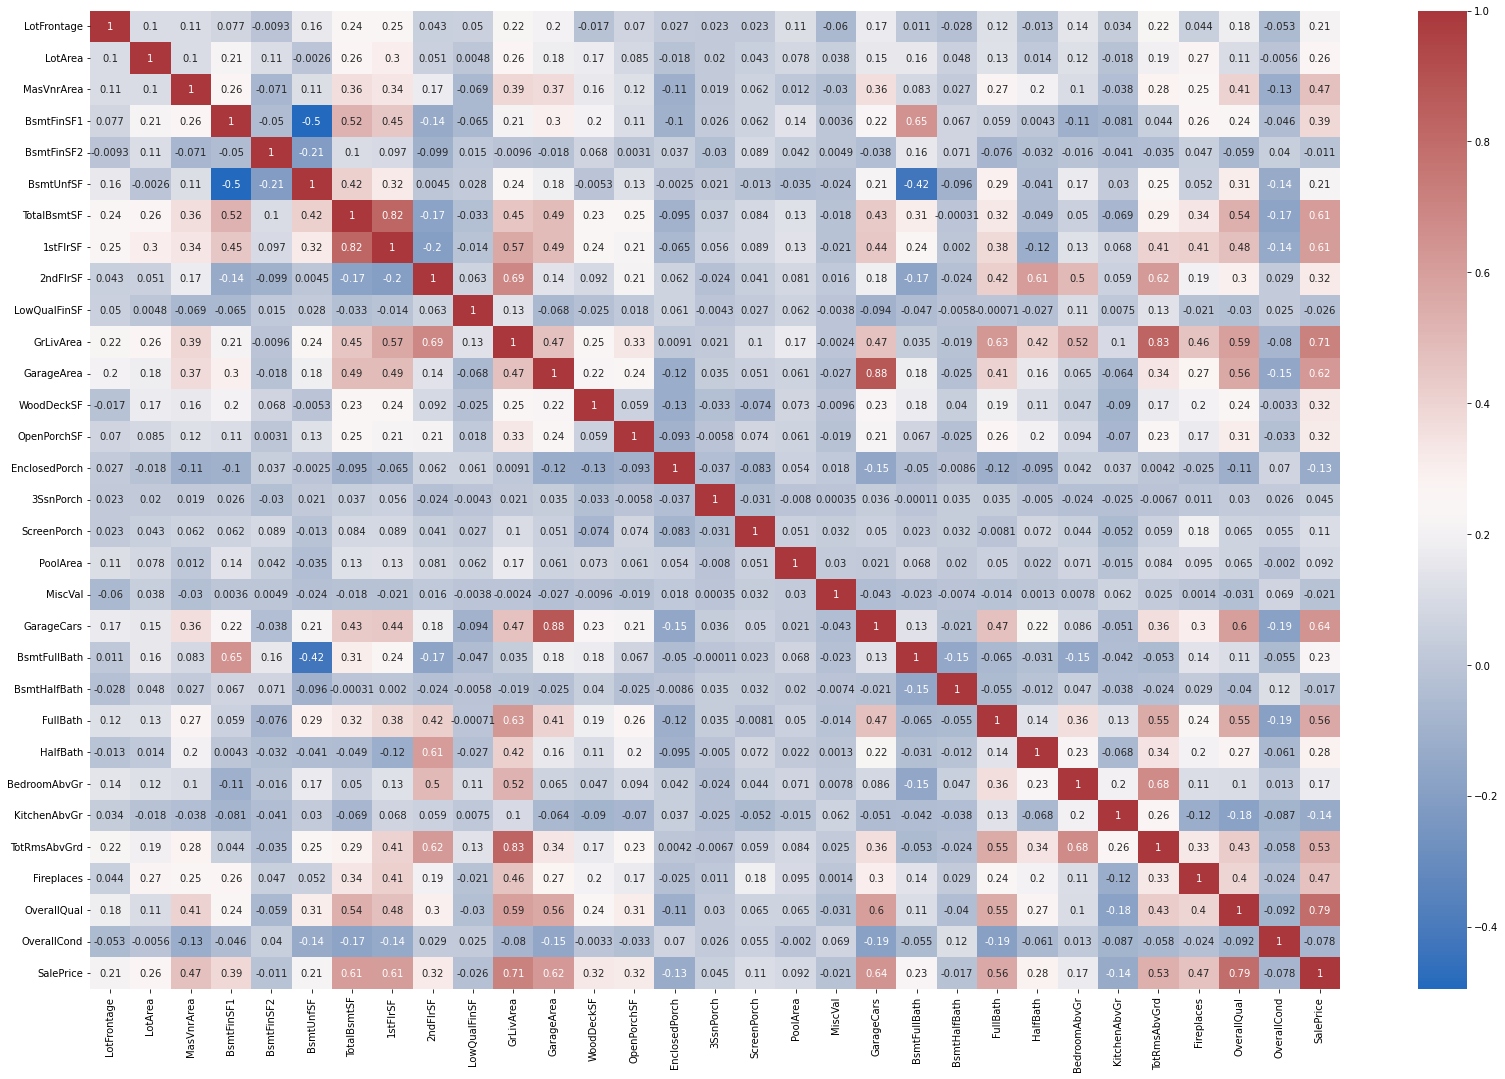

In [31]:
plt.figure(figsize=[28,18])
sns.heatmap(ass_numeric['corr'],annot=True, cmap='vlag')

In [32]:
ass_cat = associations(df[[*categorical_nominal_feats, *ordinal_feats_to_be_converted, target_feat]], numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=False, compute_only=True, clustering=False, title=None, filename=None)



<AxesSubplot:>

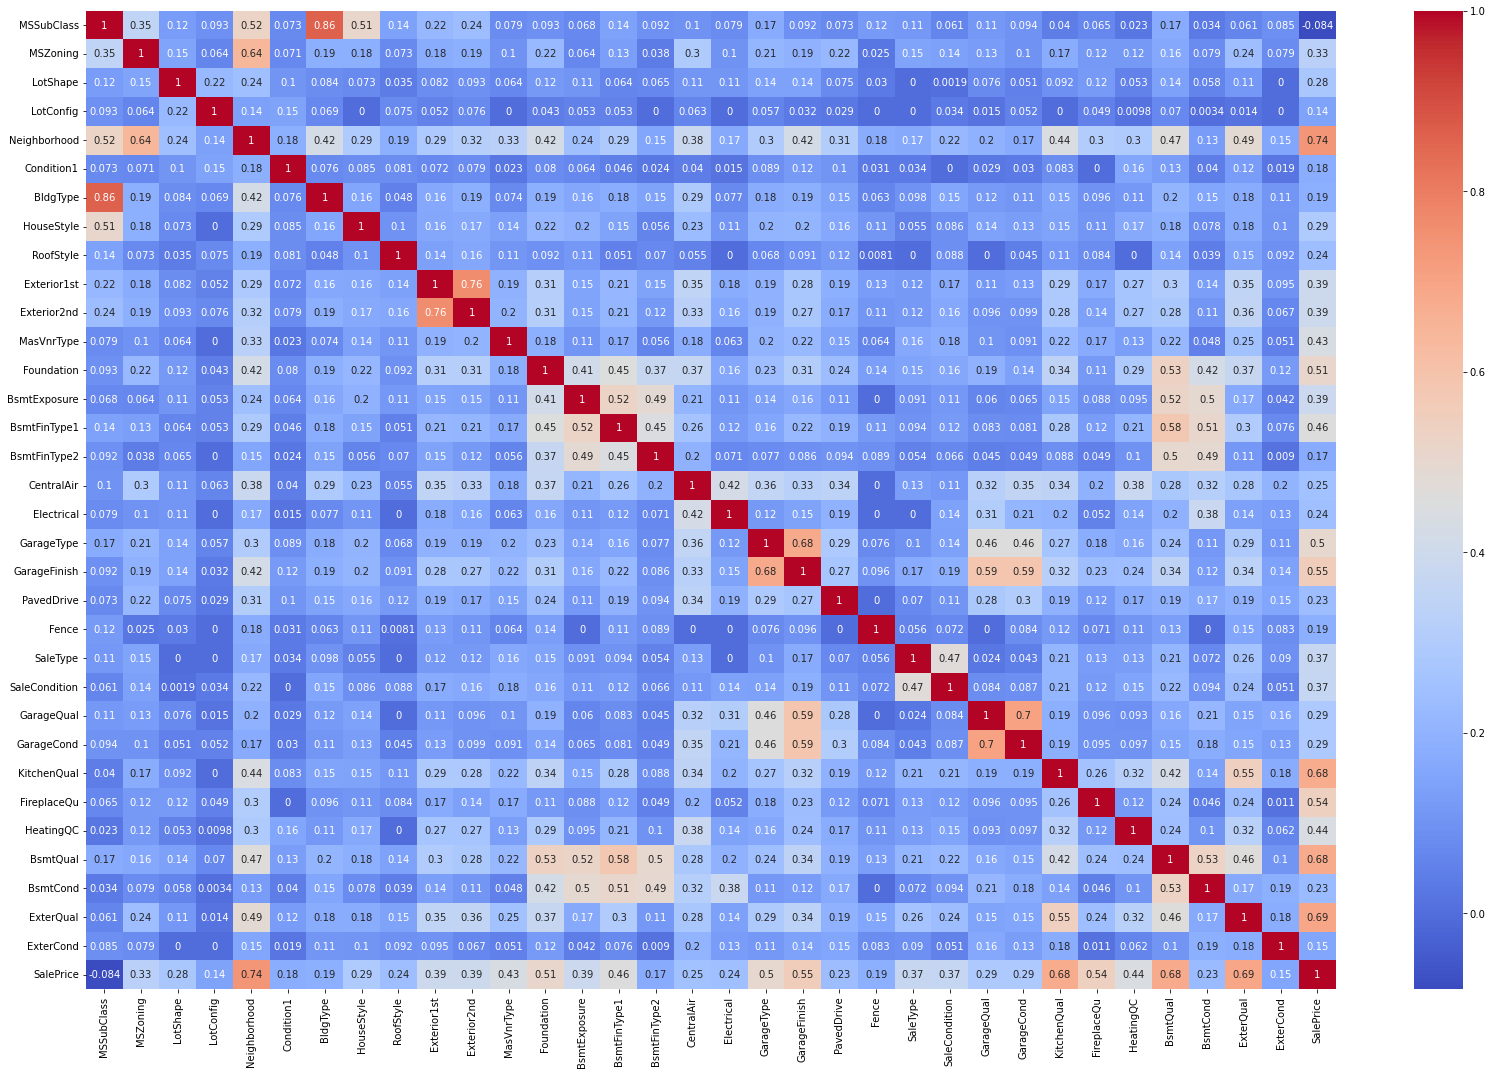

In [33]:
plt.figure(figsize=[28,18])
sns.heatmap(ass_cat['corr'],annot=True, cmap='coolwarm')

- Among the numerical features, we observe sale price has a significant high correlation with `TotalBsmtSF`, `1stFlrSF`, `GrLiveArea`, `GarageArea`, `GarageCars`, `OverallQual`, `FullBath`
- Among the categorical features, we observe sale price has a significant high correlation with `Neighborhood`, `Foundation`, `GarageFinish`

## Feature Engineerring

### Fixing/clening Data

- Fixing Missing values

In [34]:
df.shape

(1460, 69)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  MasVnrAr

In [36]:
df[df.LotFrontage.isna()].head(2)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
7          60       RL          NaN    10382      IR1    Corner       NWAmes   
12         20       RL          NaN    12968      IR2    Inside       Sawyer   

   Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
7        PosN     1Fam     2Story            7            6       1973   
12       Norm     1Fam     1Story            5            6       1962   

    YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
7           1973     Gable     HdBoard     HdBoard      Stone       240.0   
12          1962       Hip     HdBoard     Plywood       None         0.0   

   ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
7         TA        TA     CBlock       Gd       TA           Mn          ALQ   
12        TA        TA     CBlock       TA       TA           No          ALQ   

    BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
7          859          BLQ          32        216         1107        Ex   
12         737          Unf           0        175          912        TA   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
7           Y      SBrkr      1107       983             0       2090   
12          Y      SBrkr       912         0             0        912   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
7              1             0         2         1             3   
12             1             0         1         0             2   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces    FireplaceQu  \
7              1          TA             7           2             TA   
12             1          TA             4           0  not_available   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
7      Attchd       1973.0          RFn           2         484         TA   
12     Detchd       1962.0          Unf           1         352         TA   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
7          TA          Y         235          204            228          0   
12         TA          Y         140            0              0          0   

    ScreenPorch  PoolArea          Fence  MiscVal  MoSold  YrSold SaleType  \
7             0         0  not_available      350      11    2009       WD   
12          176         0  not_available        0       9    2008       WD   

   SaleCondition  SalePrice  
7         Normal     200000  
12        Normal     144000

In [37]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [38]:
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True) # replacing null values in LotFrontage with column mean, as we there are no significant outliers

In [39]:
df[df.MasVnrType.isna()].head(2)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
234         60       RL    70.049958     7851      Reg    Inside      Gilbert   
529         20       RL    70.049958    32668      IR1   CulDSac      Crawfor   

    Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234       Norm     1Fam     2Story            6            5       2002   
529       Norm     1Fam     1Story            6            3       1957   

     YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
234          2002     Gable     VinylSd     VinylSd        NaN         NaN   
529          1975       Hip     Wd Sdng       Stone        NaN         NaN   

    ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
234        Gd        TA      PConc       Gd       TA           No   
529        Gd        TA      PConc       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
234          GLQ         625          Unf           0        235          860   
529          Rec        1219          Unf           0        816         2035   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
234        Ex          Y      SBrkr       860      1100             0   
529        TA          Y      SBrkr      2515         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
234       1960             1             0         2         1             4   
529       2515             1             0         3         0             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu  \
234             1          Gd             8           2          TA   
529             2          TA             9           2          TA   

    GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
234    BuiltIn       2002.0          Fin           2         440         TA   
529     Attchd       1975.0          RFn           2         484         TA   

    GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
234         TA          Y         288           48              0          0   
529         TA          Y           0            0            200          0   

     ScreenPorch  PoolArea          Fence  MiscVal  MoSold  YrSold SaleType  \
234            0         0  not_available        0       5    2010       WD   
529            0         0  not_available        0       3    2007       WD   

    SaleCondition  SalePrice  
234        Normal     216500  
529        Alloca     200624

In [40]:
df.MasVnrType.describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [41]:
df.MasVnrType.fillna(df.MasVnrType.mode()[0], inplace = True) # replacimng MasVnrType null values with stastical mode

In [42]:
df[df.MasVnrArea.isna()].head(2)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
234         60       RL    70.049958     7851      Reg    Inside      Gilbert   
529         20       RL    70.049958    32668      IR1   CulDSac      Crawfor   

    Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234       Norm     1Fam     2Story            6            5       2002   
529       Norm     1Fam     1Story            6            3       1957   

     YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
234          2002     Gable     VinylSd     VinylSd       None         NaN   
529          1975       Hip     Wd Sdng       Stone       None         NaN   

    ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
234        Gd        TA      PConc       Gd       TA           No   
529        Gd        TA      PConc       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
234          GLQ         625          Unf           0        235          860   
529          Rec        1219          Unf           0        816         2035   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
234        Ex          Y      SBrkr       860      1100             0   
529        TA          Y      SBrkr      2515         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
234       1960             1             0         2         1             4   
529       2515             1             0         3         0             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu  \
234             1          Gd             8           2          TA   
529             2          TA             9           2          TA   

    GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
234    BuiltIn       2002.0          Fin           2         440         TA   
529     Attchd       1975.0          RFn           2         484         TA   

    GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
234         TA          Y         288           48              0          0   
529         TA          Y           0            0            200          0   

     ScreenPorch  PoolArea          Fence  MiscVal  MoSold  YrSold SaleType  \
234            0         0  not_available        0       5    2010       WD   
529            0         0  not_available        0       3    2007       WD   

    SaleCondition  SalePrice  
234        Normal     216500  
529        Alloca     200624

In [43]:
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [44]:
df.MasVnrArea.fillna(df.MasVnrArea.median(), inplace = True) # replacimng MasVnrArea null values with stastical median as there maybe some outliers here

In [45]:
df[df.BsmtFinType1.isna()].head(2)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
17         90       RL         72.0    10791      Reg    Inside       Sawyer   
39         90       RL         65.0     6040      Reg    Inside      Edwards   

   Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
17       Norm   Duplex     1Story            4            5       1967   
39       Norm   Duplex     1Story            4            5       1955   

    YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
17          1967     Gable     MetalSd     MetalSd       None         0.0   
39          1955     Gable     AsbShng     Plywood       None         0.0   

   ExterQual ExterCond Foundation       BsmtQual       BsmtCond  \
17        TA        TA       Slab  not_available  not_available   
39        TA        TA      PConc  not_available  not_available   

     BsmtExposure BsmtFinType1  BsmtFinSF1   BsmtFinType2  BsmtFinSF2  \
17  not_available          NaN           0  not_available           0   
39  not_available          NaN           0  not_available           0   

    BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  1stFlrSF  \
17          0            0        TA          Y      SBrkr      1296   
39          0            0        TA          N      FuseP      1152   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
17         0             0       1296             0             0         2   
39         0             0       1152             0             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
17         0             2             2          TA             6   
39         0             2             2          Fa             6   

    Fireplaces    FireplaceQu     GarageType  GarageYrBlt   GarageFinish  \
17           0  not_available        CarPort       1967.0            Unf   
39           0  not_available  not_available          NaN  not_available   

    GarageCars  GarageArea     GarageQual     GarageCond PavedDrive  \
17           2         516             TA             TA          Y   
39           0           0  not_available  not_available          N   

    WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
17           0            0              0          0            0         0   
39           0            0              0          0            0         0   

            Fence  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
17  not_available      500      10    2006       WD        Normal      90000  
39  not_available        0       6    2008       WD       AdjLand      82000

In [46]:
df.BsmtFinType1.describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [47]:
df.BsmtFinType1.fillna(df.BsmtFinType1.mode()[0], inplace = True) # replacimng BsmtFinType1 null values with stastical mode


In [48]:
df[df.Electrical.isna()].head(2)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
1379         80       RL         73.0     9735      Reg    Inside   

     Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
1379       Timber       Norm     1Fam       SLvl            5            5   

      YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
1379       2006          2007     Gable     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  1stFlrSF  \
1379        384          384        Gd          Y        NaN       754   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1379       640             0       1394             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
1379         1             3             1          Gd             7   

      Fireplaces    FireplaceQu GarageType  GarageYrBlt GarageFinish  \
1379           0  not_available    BuiltIn       2007.0          Fin   

      GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
1379           2         400         TA         TA          Y         100   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
1379            0              0          0            0         0   

              Fence  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
1379  not_available        0       5    2008       WD        Normal     167500

In [49]:
df.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [50]:
df.Electrical.fillna(df.Electrical.mode()[0], inplace = True) # replacimng Electrical null values with stastical mode


In [51]:
df[df.GarageYrBlt.isna()].head(2)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
39         90       RL         65.0     6040      Reg    Inside      Edwards   
48        190       RM         33.0     4456      Reg    Inside      OldTown   

   Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
39       Norm   Duplex     1Story            4            5       1955   
48       Norm   2fmCon     2Story            4            5       1920   

    YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
39          1955     Gable     AsbShng     Plywood       None         0.0   
48          2008     Gable     MetalSd     MetalSd       None         0.0   

   ExterQual ExterCond Foundation       BsmtQual       BsmtCond  \
39        TA        TA      PConc  not_available  not_available   
48        TA        TA     BrkTil             TA             TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1   BsmtFinType2  BsmtFinSF2  \
39  not_available          Unf           0  not_available           0   
48             No          Unf           0            Unf           0   

    BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  1stFlrSF  \
39          0            0        TA          N      FuseP      1152   
48        736          736        Gd          Y      SBrkr       736   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
39         0             0       1152             0             0         2   
48       716             0       1452             0             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
39         0             2             2          Fa             6   
48         0             2             3          TA             8   

    Fireplaces    FireplaceQu     GarageType  GarageYrBlt   GarageFinish  \
39           0  not_available  not_available          NaN  not_available   
48           0  not_available  not_available          NaN  not_available   

    GarageCars  GarageArea     GarageQual     GarageCond PavedDrive  \
39           0           0  not_available  not_available          N   
48           0           0  not_available  not_available          N   

    WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
39           0            0              0          0            0         0   
48           0            0            102          0            0         0   

            Fence  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
39  not_available        0       6    2008       WD       AdjLand      82000  
48  not_available        0       6    2009      New       Partial     113000

In [52]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [53]:
df.GarageYrBlt.fillna(df.GarageYrBlt.mode()[0], inplace = True) # replacimng GarageYrBlt null values with stastical mode


In [54]:
df.isna().sum().sum() # we've fixed all missing values

0

- Treating Outliers

##### we had obserevd outliers in our EDA. we'll be treating them using the IQR method

In [55]:
def get_outlier_index():
    indexes = []
    outliers = ['LotArea','GrLivArea','TotalBsmtSF', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1','GarageArea']
    for col in outliers:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.99)
        IQR = Q3-Q1
        ind = df[~((df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR))))].index
        if ind.any():
            indexes.append(ind.values)
    return indexes 

In [56]:
outlier_indexes = get_outlier_index()

In [58]:
for i in outlier_indexes:
    df.drop(i, 0, inplace=True, errors = 'ignore')

In [59]:
df.shape

(1454, 69)

##### we've successfully dropped 6 outliers

### fixing ordinal features values
-  We had obserevd some of our ordinal features representing ratings are currently nominal features, as their values are represented by strings. we can assign them numeric values so that they can be used as ordinal features

In [61]:
ordinal_feats_to_be_converted

['GarageQual',
 'GarageCond',
 'KitchenQual',
 'FireplaceQu',
 'HeatingQC',
 'BsmtQual',
 'BsmtCond',
 'ExterQual',
 'ExterCond']

In [62]:
df[ordinal_feats_to_be_converted].head()

GarageQual GarageCond KitchenQual    FireplaceQu HeatingQC BsmtQual  \
0         TA         TA          Gd  not_available        Ex       Gd   
1         TA         TA          TA             TA        Ex       Gd   
2         TA         TA          Gd             TA        Ex       Gd   
3         TA         TA          Gd             Gd        Gd       TA   
4         TA         TA          Gd             TA        Ex       Gd   

  BsmtCond ExterQual ExterCond  
0       TA        Gd        TA  
1       TA        TA        TA  
2       TA        Gd        TA  
3       Gd        TA        TA  
4       TA        Gd        TA

- Ex	Excellent - `5` 
- Gd	Good - `4`
- TA	Typical/Average - `3`
- Fa	Fair - `2`
- Po	Poor - `1`
- not_available	No Available - `0`

In [63]:
rating_map = {'Ex': 5,
             'Gd': 4,
             'TA': 3,
             'Fa': 2,
             'Po': 1,
             'not_available': 0}

In [64]:
for i in ordinal_feats_to_be_converted:
    df[i] = df[i].map(rating_map)

In [65]:
for i in ordinal_feats_to_be_converted:
    print(df[i].unique())

[3 2 4 0 5 1]
[3 2 0 4 1 5]
[4 3 5 2]
[0 3 4 2 5 1]
[5 4 3 2 1]
[4 3 5 0 2]
[3 4 0 2 1]
[4 3 5 2]
[3 4 2 1 5]


In [66]:
categorical_ordinal_feats = [*categorical_ordinal_feats, *ordinal_feats_to_be_converted]

### Feature Augmentation/ Derived Features


- We can use features with datetime information to derive features that can be used in our models

In [67]:
time_feats

['YrSold', 'MoSold', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt']

In [68]:
df[time_feats].head()

YrSold  MoSold  GarageYrBlt  YearRemodAdd  YearBuilt
0    2008       2       2003.0          2003       2003
1    2007       5       1976.0          1976       1976
2    2008       9       2001.0          2002       2001
3    2006       2       1998.0          1970       1915
4    2008      12       2000.0          2000       2000

In [69]:
df.YrSold.max()

2010

In [70]:
base_year = 2010

In [79]:
df['house_age'] = base_year - df.YearBuilt # considering base year as 2010, we can calculate the house age

In [80]:
df['garage_age'] = base_year - df.GarageYrBlt # considering base year as 2010, we can calculate the garage age

In [81]:
df['last_modeification'] = base_year - df.YearRemodAdd # considering base year as 2010, we can calculate the modification age

In [72]:
df.head(2)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg       FR2      Veenker   

  Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1      Feedr     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   

   ExterQual  ExterCond Foundation  BsmtQual  BsmtCond BsmtExposure  \
0          4          3      PConc         4         3           No   
1          3          3     CBlock         4         3           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

   HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          5          Y      SBrkr       856       854             0   
1          5          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
0             1            4             8           0            0   
1             1            3             6           1            3   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  GarageQual  \
0     Attchd       2003.0          RFn           2         548           3   
1     Attchd       1976.0          RFn           2         460           3   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3          Y           0           61              0          0   
1           3          Y         298            0              0          0   

   ScreenPorch  PoolArea          Fence  MiscVal  MoSold  YrSold SaleType  \
0            0         0  not_available        0       2    2008       WD   
1            0         0  not_available        0       5    2007       WD   

  SaleCondition  SalePrice  house_age  
0        Normal     208500          7  
1        Normal     181500         34

In [73]:
categorical_ordinal_feats.append('house_age')

### Tranforming Categorical features using dummy variables


In [74]:
df_model = pd.get_dummies(df, columns=categorical_nominal_feats, drop_first=True)

In [75]:
df_model.shape

(1454, 204)

In [82]:
df_model.drop(time_feats,1, inplace = True) # we'll also drop time based features, to prevent data leakage at time of inference. We've already used different YearBuilt, garageYrBlt and YearRemodAdd to calculate different age related derived features

In [83]:
df_model.shape

(1454, 199)

In [84]:
df_model.head(2)

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0         65.0     8450            7            5       196.0          4   
1         80.0     9600            6            8         0.0          3   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          3         4         3         706           0        150   
1          3         4         3         978           0        284   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856          5       856       854             0       1710   
1         1262          5      1262         0             0       1262   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  GarageArea  \
0            4             8           0            0           2         548   
1            3             6           1            3           2         460   

   GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           3           3           0           61              0          0   
1           3           3         298            0              0          0   

   ScreenPorch  PoolArea  MiscVal  SalePrice  house_age  MSSubClass_30  \
0            0         0        0     208500          7              0   
1            0         0        0     181500         34              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0               0   
1              0              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1            0             0             0             1   
1            1            0             0             0             1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0         

In [85]:
df_model_copy = df_model.copy()

### Train-Test split

In [566]:
X_train, X_test, y_train, y_test = train_test_split(df_model_copy.drop(target_feat, 1), df_model_copy[target_feat], test_size=0.25, random_state=10)


### Scaling numeric features

In [567]:
scaler = StandardScaler() 

In [568]:
X_train[numerical_feats] = scaler.fit_transform(X_train[numerical_feats]) # scaling train features

In [569]:
X_test[numerical_feats] = scaler.transform(X_test[numerical_feats]) # scaling test features

#### we won't be scaling target variable for interpretation reasons

## Modelling

###  Linear Regression

In [378]:
X_train_lr = X_train.copy()
y_train_lr = y_train.copy()

In [379]:
X_test_lr = X_test.copy()
y_test_lr = y_test.copy()

#### basic LR model

In [ ]:
r2_score()

In [389]:
import math

In [391]:
lm = LinearRegression()
lm.fit(X_train_lr, y_train_lr)

y_train_pred = lm.predict(X_train_lr)
print(f'r-squared on train {r2_score(y_true=y_train_lr, y_pred=y_train_pred)}')
print(f'mse on train {mean_squared_error(y_train_lr, y_train_pred)}')
print(f'rmse on train {math.sqrt(mean_squared_error(y_train_lr, y_train_pred))}\n')
y_test_pred = lm.predict(X_test_lr)
print(f'r-squared on test {r2_score(y_test, y_test_pred)}')
print(f'mse on test {mean_squared_error(y_test, y_test_pred)}')
print(f'rmse on test {math.sqrt(mean_squared_error(y_test, y_test_pred))}')

r-squared on train 0.909882335355099
mse on train 549890599.765681
rmse on train 23449.74626228781

r-squared on test 0.8762927913955642
mse on test 845679469.118202
rmse on test 29080.56858313128


#### Running RFE with CV to find optimal number of features for lin. regression

In [276]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': list(range(1, 200, 2))}]

lm = LinearRegression()
lm.fit(X_train_lr, y_train_lr)
rfe = RFE(lm)             

model_cv_lr = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
model_cv_lr.fit(X_train_lr, y_train_lr)          

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 3, 5, 7, 9, 11, 13, 15,
                                                   17, 19, 21, 23, 25, 27, 29,
                                                   31, 33, 35, 37, 39, 41, 43,
                                                   45, 47, 49, 51, 53, 55, 57,
                                                   59, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [277]:
model_cv_lr.best_estimator_ # getting optimum features for linear regression

RFE(estimator=LinearRegression(), n_features_to_select=191)

In [392]:
rfe_n_features = 191

lm = LinearRegression()
lm.fit(X_train_lr, y_train_lr)

rfe = RFE(lm, n_features_to_select=rfe_n_features)             
rfe = rfe.fit(X_train, y_train)


In [393]:
feat_rfe_out = rfe.get_feature_names_out()

In [394]:
len(feat_rfe_out)

191

In [395]:
X_train_lr.shape

(1090, 198)

In [396]:
rfe_to_drop = X_train_lr.columns.difference(feat_rfe_out)

In [397]:
X_train_lr.drop(rfe_to_drop,1, inplace=True)
X_test_lr.drop(rfe_to_drop, 1, inplace = True)


#### training linear regression model with only the 191 features selected by rfe

In [398]:
lm = LinearRegression()
lm.fit(X_train_lr, y_train_lr)

y_train_pred = lm.predict(X_train_lr)
print(f'r-squared on train {r2_score(y_true=y_train_lr, y_pred=y_train_pred)}')
print(f'mse on train {mean_squared_error(y_train_lr, y_train_pred)}')
print(f'rmse on train {math.sqrt(mean_squared_error(y_train_lr, y_train_pred))}\n')

y_test_pred = lm.predict(X_test_lr)
print(f'r-squared on test {r2_score(y_test, y_test_pred)}')
print(f'mse on test {mean_squared_error(y_test, y_test_pred)}')
print(f'rmse on test {math.sqrt(mean_squared_error(y_test, y_test_pred))}')

r-squared on train 0.9094862354626818
mse on train 552307568.8279252
rmse on train 23501.22483675958

r-squared on test 0.8767904770940786
mse on test 842277221.3263751
rmse on test 29022.012702884254


## Residual analysis

In [399]:
y_train_pred = lm.predict(X_train_lr)

In [400]:
residual = y_train_lr - y_train_pred

#### normallity test

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

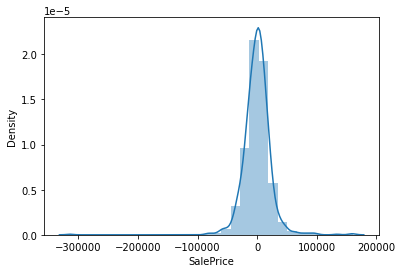

In [401]:
fig = plt.figure()
sns.distplot((residual), bins = 30)


#### Homoscedasticity test

<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>

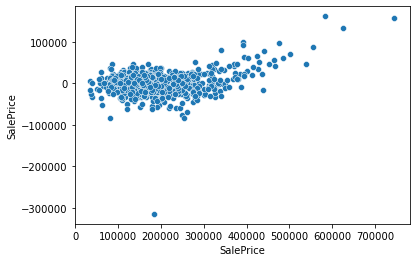

In [402]:
sns.scatterplot(y_train,residual)


Text(0, 0.5, 'Residual')

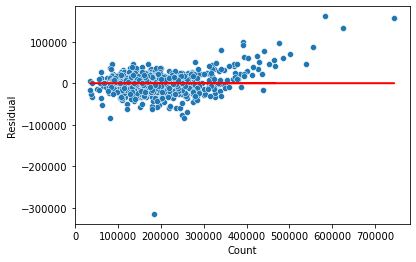

In [403]:
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')


#### fundamental tests look good

## Ridge regression (L2)

In [404]:
X_train_ri = X_train.copy()
y_train_ri = y_train.copy()

In [405]:
X_test_ri = X_test.copy()
y_test_ri = y_test.copy()

In [421]:
params = {'alpha': [0.001, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0 , 7.0, 8.0, 10.0,12, 15, 18, 20, 30, 40, 50, 100, 500, 1000 ]}

ridge = Ridge()

kfolds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = kfolds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_ri, y_train_ri) 


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.7,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0,
                                   12, 15, 18, 20, 30, 40, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [422]:
model_cv.best_estimator_

Ridge(alpha=15)

In [424]:
#Fitting Ridge model for alpha = 15
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ri, y_train_ri)

Ridge(alpha=15)

In [426]:
y_train_pred = ridge.predict(X_train_ri)
print(f'r-squared on train {r2_score(y_true=y_train_ri, y_pred=y_train_pred)}')
print(f'mse on train {mean_squared_error(y_train_ri, y_train_pred)}')
print(f'rmse on train {math.sqrt(mean_squared_error(y_train_ri, y_train_pred))}\n')

y_test_pred = ridge.predict(X_test_ri)
print(f'r-squared on test {r2_score(y_test_ri, y_test_pred)}')
print(f'mse on test {mean_squared_error(y_test_ri, y_test_pred)}')
print(f'rmse on test {math.sqrt(mean_squared_error(y_test_ri, y_test_pred))}')


r-squared on train 0.9003395546818886
mse on train 608119864.8992281
rmse on train 24660.08647387977

r-squared on test 0.8839373956052724
mse on test 793419904.7596134
rmse on test 28167.710321565246


### using rfe to select only the top 100 features for ridge regression

In [427]:
rfe_n_features = 100

ridge = Ridge(alpha=alpha)
ridge.fit(X_train_ri, y_train_ri)

rfe = RFE(lm, n_features_to_select=rfe_n_features)             
rfe = rfe.fit(X_train_ri, y_train_ri)


In [428]:
feat_rfe_out = rfe.get_feature_names_out()

In [501]:
len(feat_rfe_out)

100

In [433]:
X_train_ri.shape

(1090, 198)

In [434]:
rfe_to_drop = X_train_ri.columns.difference(feat_rfe_out)

In [435]:
X_train_ri.drop(rfe_to_drop,1, inplace=True)
X_test_ri.drop(rfe_to_drop, 1, inplace = True)


In [436]:
#Fitting Ridge model for alpha = 15
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ri, y_train_ri)

Ridge(alpha=15)

In [437]:
y_train_pred = ridge.predict(X_train_ri)
print(f'r-squared on train {r2_score(y_true=y_train_ri, y_pred=y_train_pred)}')
print(f'mse on train {mean_squared_error(y_train_ri, y_train_pred)}')
print(f'rmse on train {math.sqrt(mean_squared_error(y_train_ri, y_train_pred))}\n')

y_test_pred = ridge.predict(X_test_ri)
print(f'r-squared on test {r2_score(y_test_ri, y_test_pred)}')
print(f'mse on test {mean_squared_error(y_test_ri, y_test_pred)}')
print(f'rmse on test {math.sqrt(mean_squared_error(y_test_ri, y_test_pred))}')


r-squared on train 0.8795359413994652
mse on train 735061807.1948041
rmse on train 27112.02329585168

r-squared on test 0.8772406526741859
mse on test 839199759.2294617
rmse on test 28968.944737933787


#### treating multi-collinearity with VIF

In [442]:
def get_vif(train_set): 
    vif = pd.DataFrame()
    X = train_set
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [443]:
vif = get_vif(X_test_ri)

In [445]:
high_vif = vif[vif['VIF']>10]
high_vif

Features     VIF
49             BldgType_Duplex     inf
7                 LowQualFinSF     inf
85  BsmtFinType2_not_available     inf
90    GarageType_not_available     inf
91  GarageFinish_not_available     inf
83  BsmtExposure_not_available     inf
18               MSSubClass_90     inf
8                    GrLivArea     inf
6                     2ndFlrSF     inf
5                     1stFlrSF     inf
4                  TotalBsmtSF     inf
3                    BsmtUnfSF     inf
2                   BsmtFinSF2     inf
1                   BsmtFinSF1     inf
78             MasVnrType_None  309.97
12                  GarageQual  210.00
24                 MSZoning_RL  187.68
86           GarageType_Attchd  151.43
77          MasVnrType_BrkFace  141.48
57             RoofStyle_Gable  119.93
0                  OverallQual   96.44
9                 KitchenAbvGr   88.89
10                 KitchenQual   81.84
89           GarageType_Detchd   68.28
79            MasVnrType_Stone   59.87
25                 MSZoning_RM   37.30
75         Exterior2nd_VinylSd   34.10
68         Exterior1st_VinylSd   33.13
59               RoofStyle_Hip   32.62
11                  GarageCars   28.75
51             BldgType_TwnhsE   25.90
20              MSSubClass_160   21.81
99        SaleCondition_Normal   20.36
19              MSSubClass_120   19.11
52           HouseStyle_1Story   18.54
50              BldgType_Twnhs   16.22
88          GarageType_BuiltIn   15.57
46             Condition1_Norm   13.16
22                 MSZoning_FV   11.74
55           HouseStyle_2Story   11.29

In [448]:
X_train_ri.drop(high_vif.Features,axis=1, inplace=True)
X_test_ri.drop(high_vif.Features,axis=1, inplace = True)

In [449]:
X_train_ri.shape

(1090, 60)

In [450]:
#Fitting Ridge model for alpha = 15
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ri, y_train_ri)

Ridge(alpha=15)

In [451]:
y_train_pred = ridge.predict(X_train_ri)
print(f'r-squared on train {r2_score(y_true=y_train_ri, y_pred=y_train_pred)}')
print(f'mse on train {mean_squared_error(y_train_ri, y_train_pred)}')
print(f'rmse on train {math.sqrt(mean_squared_error(y_train_ri, y_train_pred))}\n')

y_test_pred = ridge.predict(X_test_ri)
print(f'r-squared on test {r2_score(y_test_ri, y_test_pred)}')
print(f'mse on test {mean_squared_error(y_test_ri, y_test_pred)}')
print(f'rmse on test {math.sqrt(mean_squared_error(y_test_ri, y_test_pred))}')


r-squared on train 0.6064239719737339
mse on train 2401568648.694489
rmse on train 49005.8021941738

r-squared on test 0.5668162039563768
mse on test 2961303927.2445664
rmse on test 54417.864045224764


## Residual analysis

In [452]:
y_train_pred = ridge.predict(X_train_ri)

In [453]:
residual = y_train_ri - y_train_pred

#### normallity test

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

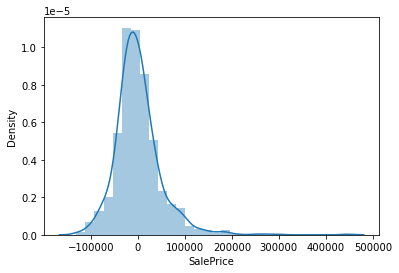

In [454]:
fig = plt.figure()
sns.distplot((residual), bins = 30)


#### Homoscedasticity test

<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>

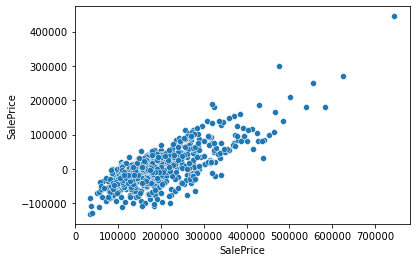

In [455]:
sns.scatterplot(y_train,residual)


Text(0, 0.5, 'Residual')

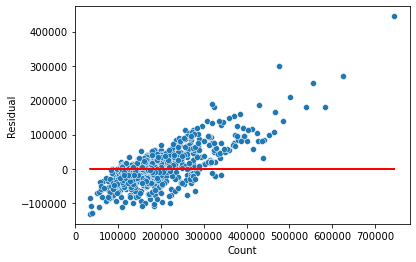

In [456]:
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')


#### fundamental tests look good

#### Looking at ridge regression coefficeints to understand the most important features

In [463]:
ridge_coef = pd.DataFrame({'Feature':X_train_ri.columns, 'Coefficient':ridge.coef_.round(3)})
ridge_coef.reset_index(drop=True, inplace=True)


In [464]:
ridge_coef.sort_values('Coefficient').head(10)

Feature  Coefficient
0          MSSubClass_30   -43818.132
14  Neighborhood_Edwards   -34044.737
17    Neighborhood_NAmes   -25093.651
23   Neighborhood_Sawyer   -22642.073
5         MSSubClass_180   -22172.128
10   Neighborhood_BrDale   -20745.652
21  Neighborhood_OldTown   -20353.644
15  Neighborhood_Gilbert   -17932.959
37   Exterior1st_HdBoard   -13317.235
6            MSZoning_RH   -10642.727

In [465]:
ridge_coef.sort_values('Coefficient').tail(10)

Feature  Coefficient
9      LotConfig_CulDSac    19130.943
43   Exterior2nd_ImStucc    20481.411
29     HouseStyle_2.5Fin    23751.572
13  Neighborhood_Crawfor    27882.758
2          MSSubClass_60    47096.288
55          SaleType_New    50180.573
25  Neighborhood_StoneBr    57154.160
50       BsmtExposure_Gd    57774.857
19  Neighborhood_NoRidge    76841.990
20  Neighborhood_NridgHt    82009.578

### Lasso Regression (L1)

In [476]:
lasso = Lasso()
params = {'alpha': [0.001, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0 , 7.0, 8.0, 10.0,12, 15, 18, 20, 30, 40, 50, 75,90, 100, 120, 150, 200, 500, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = kfolds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.7,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0,
                                   12, 15, 18, 20, 30, 40, 50, 75, 90, 100, 120,
                                   150, 200, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [477]:
model_cv.best_estimator_

Lasso(alpha=120)

In [479]:
#Fitting Ridge model for alpha = 120

alpha =120

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=120)

In [480]:

y_train_pred = lasso.predict(X_train)
print(f'r-squared on train {r2_score(y_true=y_train, y_pred=y_train_pred)}')
print(f'mse on train {mean_squared_error(y_train, y_train_pred)}')
print(f'rmse on train {math.sqrt(mean_squared_error(y_train, y_train_pred))}\n')

y_test_pred = lasso.predict(X_test)
print(f'r-squared on test {r2_score(y_test, y_test_pred)}')
print(f'mse on test {mean_squared_error(y_test, y_test_pred)}')
print(f'rmse on test {math.sqrt(mean_squared_error(y_test, y_test_pred))}')

r-squared on train 0.8984490899780461
mse on train 619655325.4987462
rmse on train 24892.877003246253

r-squared on test 0.8842105539840042
mse on test 791552556.5644912
rmse on test 28134.543830751747


## Residual analysis

In [482]:
y_train_pred = lasso.predict(X_train)

In [483]:
residual = y_train - y_train_pred

#### normallity test

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

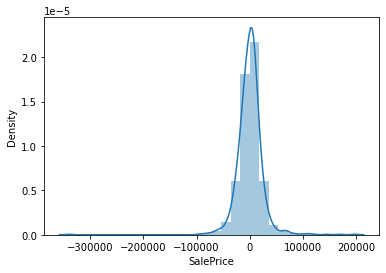

In [484]:
fig = plt.figure()
sns.distplot((residual), bins = 30)


#### Homoscedasticity test

<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>

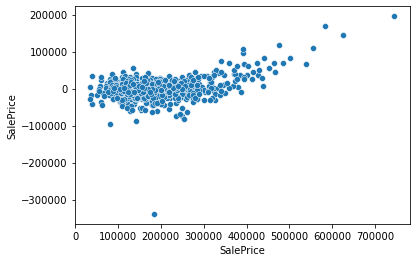

In [485]:
sns.scatterplot(y_train,residual)


Text(0, 0.5, 'Residual')

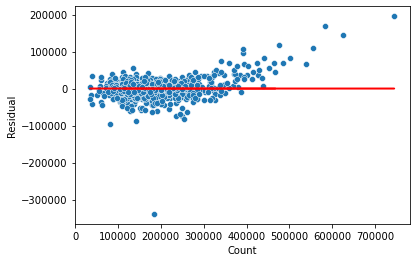

In [486]:
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')


#### fundamental tests look good

#### Looking at lasso regression coefficeints to understand the most important features

In [488]:
lasso_coef = pd.DataFrame({'Feature':X_train.columns, 'Coefficient':lasso.coef_.round(3)})
lasso_coef.reset_index(drop=True, inplace=True)


In [489]:
lasso_coef.sort_values('Coefficient').head(10)

Feature  Coefficient
23           KitchenAbvGr   -18076.763
51         MSSubClass_160   -12015.085
71   Neighborhood_Edwards   -10747.523
50         MSSubClass_120   -10233.174
92        Condition1_PosN    -8191.228
152       BsmtExposure_No    -5292.836
22           BedroomAbvGr    -4833.279
8                BsmtCond    -4488.611
176      GarageFinish_RFn    -4473.039
31             GarageCond    -4294.604

In [546]:
lasso_coef.sort_values('Coefficient').tail(10)

Feature  Coefficient
9               BsmtFinSF1     7522.604
12             TotalBsmtSF     8828.664
111    Exterior1st_BrkFace     8829.525
129    Exterior2nd_ImStucc    10194.476
86         Condition1_Norm    10374.545
69    Neighborhood_Crawfor    10874.203
2              OverallQual    12282.811
146        BsmtExposure_Gd    12790.763
192  SaleCondition_Partial    16568.669
17               GrLivArea    18315.842

### Inferences/Interpretetions from the modelling
- We'll draw inferences from coefficients observed while performing lasso regression

#### The features having the highest negative impact on sales price are:
- `KitchenAbvGr`,
- `MSSubClass_160`,
- `Neighborhood_Edwards`,
- `MSSubClass_120`,
- `Condition1_PosN`,
- `BsmtExposure_No`,
- `BedroomAbvGr`,
- `BsmtCond`,
- `GarageFinish_RFn`,
- `GarageCond`

### These features have an estimated negative impact as follows:

In [489]:
lasso_coef.sort_values('Coefficient').head(10)

Feature  Coefficient
23           KitchenAbvGr   -18076.763
51         MSSubClass_160   -12015.085
71   Neighborhood_Edwards   -10747.523
50         MSSubClass_120   -10233.174
92        Condition1_PosN    -8191.228
152       BsmtExposure_No    -5292.836
22           BedroomAbvGr    -4833.279
8                BsmtCond    -4488.611
176      GarageFinish_RFn    -4473.039
31             GarageCond    -4294.604

### These features have an estimated psoitive impact as follows:

In [500]:
lasso_coef.sort_values('Coefficient').tail(10)

Feature  Coefficient
115   Exterior1st_BrkFace    10897.601
2             OverallQual    11042.821
85   Neighborhood_Somerst    12100.819
150       BsmtExposure_Gd    14414.020
70   Neighborhood_Crawfor    17094.095
17              GrLivArea    18882.683
190          SaleType_New    19812.840
79   Neighborhood_NoRidge    28006.267
80   Neighborhood_NridgHt    32608.892
86   Neighborhood_StoneBr    35237.518

#### The features having the highest positive impact on sales price are:
- `Exterior1st_BrkFace`,
- `OverallQual`,
- `Neighborhood_Somerst`,
- `BsmtExposure_Gd`,
- `Neighborhood_Crawfor`,
- `GrLivArea`,
- `SaleType_New`,
- `Neighborhood_NoRidge`,
- `Neighborhood_NridgHt`,
- `Neighborhood_StoneBr`

### Subjective expirement

In [502]:
#Fitting Ridge model for alpha = 30 (dobling optimum alpha to test hypothesis)
# Model being fitten on a trimmed dataset after feature elemination using RFE and removing multi colinearity by observing the VIF
alpha = 30
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ri, y_train_ri)

Ridge(alpha=30)

In [503]:
y_train_pred = ridge.predict(X_train_ri)
print(f'r-squared on train {r2_score(y_true=y_train_ri, y_pred=y_train_pred)}')
print(f'mse on train {mean_squared_error(y_train_ri, y_train_pred)}')
print(f'rmse on train {math.sqrt(mean_squared_error(y_train_ri, y_train_pred))}\n')

y_test_pred = ridge.predict(X_test_ri)
print(f'r-squared on test {r2_score(y_test_ri, y_test_pred)}')
print(f'mse on test {mean_squared_error(y_test_ri, y_test_pred)}')
print(f'rmse on test {math.sqrt(mean_squared_error(y_test_ri, y_test_pred))}')


r-squared on train 0.5716809043052732
mse on train 2613567998.5798893
rmse on train 51123.06718673958

r-squared on test 0.5312637175344683
mse on test 3204345607.53379
rmse on test 56606.93957046071


In [504]:
ridge_coef = pd.DataFrame({'Feature':X_train_ri.columns, 'Coefficient':ridge.coef_.round(3)})
ridge_coef.reset_index(drop=True, inplace=True)


In [505]:
ridge_coef.sort_values('Coefficient').head(10)

Feature  Coefficient
0          MSSubClass_30   -36521.944
14  Neighborhood_Edwards   -30058.364
17    Neighborhood_NAmes   -24320.642
23   Neighborhood_Sawyer   -20412.857
21  Neighborhood_OldTown   -19367.550
15  Neighborhood_Gilbert   -15555.507
10   Neighborhood_BrDale   -13798.983
5         MSSubClass_180   -13190.980
37   Exterior1st_HdBoard   -12999.685
51      BsmtFinType1_LwQ    -8762.227

In [506]:
ridge_coef.sort_values('Coefficient').tail(10)

Feature  Coefficient
29     HouseStyle_2.5Fin    13773.307
26   Neighborhood_Timber    14003.577
9      LotConfig_CulDSac    17630.925
13  Neighborhood_Crawfor    20779.405
25  Neighborhood_StoneBr    39526.127
55          SaleType_New    46174.013
2          MSSubClass_60    46410.639
50       BsmtExposure_Gd    52901.149
19  Neighborhood_NoRidge    58718.678
20  Neighborhood_NridgHt    68420.734

In [551]:
#Fitting lasso model for alpha = 240 (doubling optimum alpha to test hypothesis)


alpha =240

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=240)

In [552]:

y_train_pred = lasso.predict(X_train)
print(f'r-squared on train {r2_score(y_true=y_train, y_pred=y_train_pred)}')
print(f'mse on train {mean_squared_error(y_train, y_train_pred)}')
print(f'rmse on train {math.sqrt(mean_squared_error(y_train, y_train_pred))}\n')

y_test_pred = lasso.predict(X_test)
print(f'r-squared on test {r2_score(y_test, y_test_pred)}')
print(f'mse on test {mean_squared_error(y_test, y_test_pred)}')
print(f'rmse on test {math.sqrt(mean_squared_error(y_test, y_test_pred))}')

r-squared on train 0.89142595341616
mse on train 662509928.8827711
rmse on train 25739.26822741414

r-squared on test 0.8802426877119285
mse on test 818677435.3840488
rmse on test 28612.539827565968


In [553]:
lasso_coef = pd.DataFrame({'Feature':X_train.columns, 'Coefficient':lasso.coef_.round(3)})
lasso_coef.reset_index(drop=True, inplace=True)


In [554]:
lasso_coef.sort_values('Coefficient').head(10)

Feature  Coefficient
23           KitchenAbvGr   -14074.934
71   Neighborhood_Edwards    -7677.612
8                BsmtCond    -5037.836
152       BsmtExposure_No    -5005.941
51         MSSubClass_160    -4849.774
100       BldgType_TwnhsE    -4809.032
22           BedroomAbvGr    -4530.017
31             GarageCond    -3220.012
50         MSSubClass_120    -3186.777
176      GarageFinish_RFn    -3175.424

In [555]:
lasso_coef.sort_values('Coefficient').tail(10)

Feature  Coefficient
12            TotalBsmtSF     8029.733
90        Condition1_Norm     8450.073
2             OverallQual    11607.173
70   Neighborhood_Crawfor    12672.203
150       BsmtExposure_Gd    12878.250
190          SaleType_New    16419.817
17              GrLivArea    19739.630
79   Neighborhood_NoRidge    24161.582
86   Neighborhood_StoneBr    25128.911
80   Neighborhood_NridgHt    26724.638

####  Removing top predictos to perform lasso

In [ ]:
OverallQual		12282.811
	BsmtExposure_Gd	12790.763
	SaleCondition_Partial	16568.669
	GrLivArea		18315.842
	KitchenAbvGr		-18076.763


In [570]:
feat_to_drop = ['OverallQual', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'GrLivArea', 'KitchenAbvGr']

In [571]:
X_train.drop(feat_to_drop, 1, inplace=True)
X_test.drop(feat_to_drop, 1, inplace=True)

In [572]:
#Fitting Ridge model for alpha = 120

alpha =120

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=120)

In [573]:

y_train_pred = lasso.predict(X_train)
print(f'r-squared on train {r2_score(y_true=y_train, y_pred=y_train_pred)}')
print(f'mse on train {mean_squared_error(y_train, y_train_pred)}')
print(f'rmse on train {math.sqrt(mean_squared_error(y_train, y_train_pred))}\n')

y_test_pred = lasso.predict(X_test)
print(f'r-squared on test {r2_score(y_test, y_test_pred)}')
print(f'mse on test {mean_squared_error(y_test, y_test_pred)}')
print(f'rmse on test {math.sqrt(mean_squared_error(y_test, y_test_pred))}')

r-squared on train 0.8869561929182559
mse on train 689784040.9082712
rmse on train 26263.740040372606

r-squared on test 0.8794033365887657
mse on test 824415354.9462771
rmse on test 28712.63406492475


In [574]:
lasso_coef = pd.DataFrame({'Feature':X_train.columns, 'Coefficient':lasso.coef_.round(3)})
lasso_coef.reset_index(drop=True, inplace=True)


In [575]:
lasso_coef.sort_values('Coefficient').head(10)

Feature  Coefficient
46          MSSubClass_90   -11211.795
148       BsmtExposure_No   -11136.310
89        Condition1_PosN   -10891.070
97        BldgType_TwnhsE   -10753.175
68   Neighborhood_Edwards    -9270.720
96         BldgType_Twnhs    -7761.407
172      GarageFinish_RFn    -6302.867
72   Neighborhood_Mitchel    -6013.136
48         MSSubClass_160    -5482.247
20           BedroomAbvGr    -4649.554

In [576]:
lasso_coef.sort_values('Coefficient').tail(10)

Feature  Coefficient
11            TotalBsmtSF    10793.712
130   Exterior2nd_ImStucc    10995.349
82   Neighborhood_Somerst    13087.523
13               1stFlrSF    15169.470
67   Neighborhood_Crawfor    17422.877
186          SaleType_New    18341.458
14               2ndFlrSF    22597.902
76   Neighborhood_NoRidge    28557.180
77   Neighborhood_NridgHt    34991.987
83   Neighborhood_StoneBr    41485.555

In [565]:
X_train.shape

(1090, 193)